In [98]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:

file_path_1 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/COMPUSTAT_ALL.csv' # Fundamental data
df1 = pd.read_csv(file_path_1)
df1['datadate'] = pd.to_datetime(df1['datadate'])
df1 = df1.sort_values(by=['tic', 'datadate'])

df1.info()

/var/folders/2f/bmcm36r135v_v27k0vz0w_dr0000gn/T/ipykernel_58799/554828581.py:2: DtypeWarning: Columns (10,17,26,650,657,668,669,679) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path_1)


<class 'pandas.core.frame.DataFrame'>
Index: 17770 entries, 1237 to 15084
Columns: 680 entries, gvkey to ipodate
dtypes: datetime64[ns](1), float64(622), int64(16), object(41)
memory usage: 92.3+ MB


In [100]:
file_path_2 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/RATIOS_FIRM_ALL.csv' # Financial ratios data
df2 = pd.read_csv(file_path_2)
df2['qdate'] = pd.to_datetime(df2['qdate'])
df2['public_date'] = pd.to_datetime(df2['public_date'])

# Sort by qdate and public_date to ensure the most recent public_date comes last
df2 = df2.sort_values(by=['qdate', 'public_date'])
# Drop duplicates to keep only the first public_date for each qdate
df2 = df2.drop_duplicates(subset=['qdate','TICKER'], keep='first')

In [101]:
df = pd.merge(df1, df2, left_on=['datadate', 'gvkey'], right_on=['qdate', 'gvkey'], how='inner')
# convert divyield to float
df['divyield'] = df['divyield'].replace('%', '', regex=True).astype(float)
df = df[['datadate', 'tic'] + df.select_dtypes(include='float').columns.tolist()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Columns: 695 entries, datadate to PEG_ltgforward
dtypes: datetime64[ns](1), float64(693), object(1)
memory usage: 81.1+ MB


In [102]:
df = df[pd.to_datetime(df['datadate']) > pd.Timestamp('1970-01-01')]

In [103]:
# Drop columns with more than, say, 30% missing values
df = df.dropna(thresh=int(0.5 * len(df)), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15230 entries, 0 to 15303
Columns: 234 entries, datadate to PEG_ltgforward
dtypes: datetime64[ns](1), float64(232), object(1)
memory usage: 27.3+ MB


In [104]:
correlation_matrix = df.select_dtypes(include='float').corr()
print(correlation_matrix)

                   ajexq      ajpq  currtrq      scfq      srcq    acchgq  \
ajexq           1.000000  0.999951      NaN -0.076141 -0.002942  0.002376   
ajpq            0.999951  1.000000      NaN -0.076095 -0.002974  0.002375   
currtrq              NaN       NaN      NaN       NaN       NaN       NaN   
scfq           -0.076141 -0.076095      NaN  1.000000 -0.431651 -0.019662   
srcq           -0.002942 -0.002974      NaN -0.431651  1.000000 -0.036008   
...                  ...       ...      ...       ...       ...       ...   
ptb            -0.036579 -0.036631      NaN  0.098970 -0.143768  0.008368   
PEG_trailing    0.266279  0.266034      NaN -0.010789 -0.048470 -0.009830   
divyield       -0.042165 -0.041962      NaN -0.130243  0.192311 -0.010195   
PEG_1yrforward -0.017714 -0.017724      NaN  0.001399  0.006213 -0.004295   
PEG_ltgforward  0.048991  0.048981      NaN  0.024602 -0.034185 -0.000006   

                    acoq      actq      ancq       aoq  ...  sale_nwc  \
aj

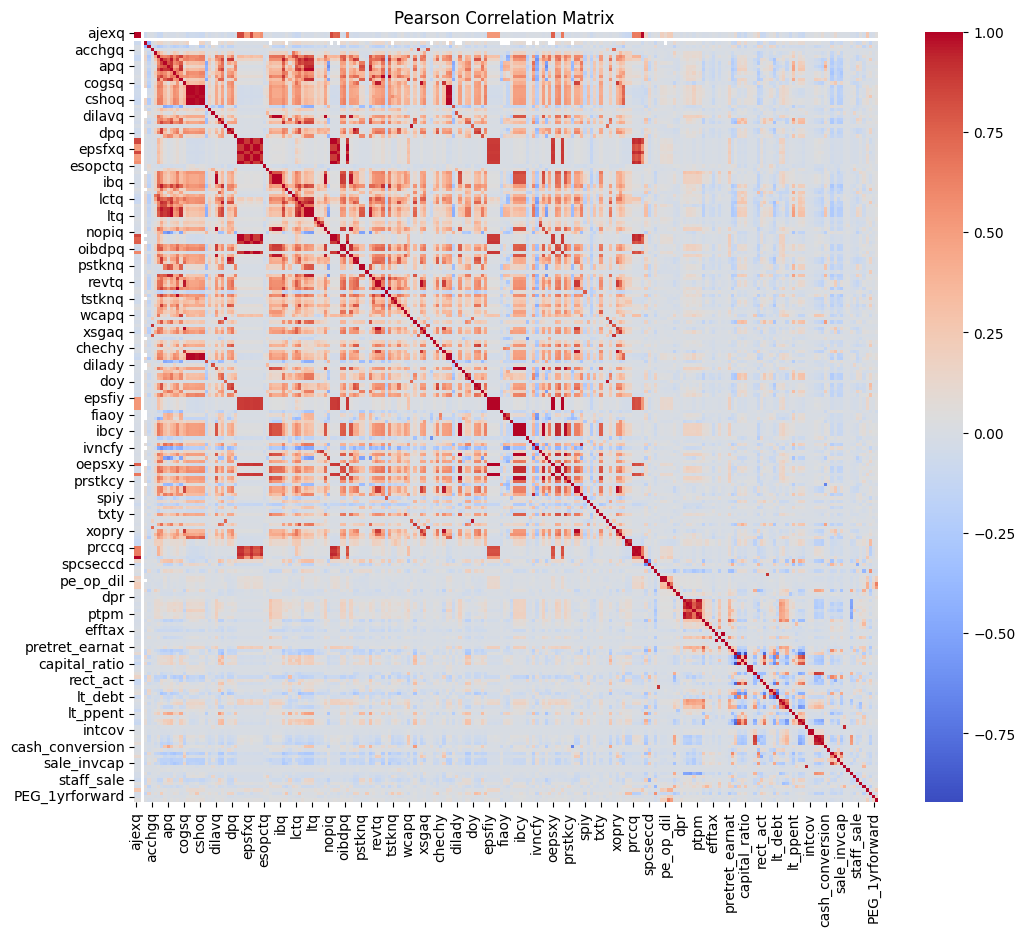

In [105]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Pearson Correlation Matrix ")
plt.show()

In [106]:
# Set a correlation threshold
threshold = 0.8

# Create mask to ignore self-correlations
corr_matrix = df.select_dtypes(include='float').corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with any correlation above the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("Highly correlated features to drop:")
print(to_drop)

to_drop.remove('prccq')
to_drop.remove('lctq')
to_drop.remove('cshoq')



Highly correlated features to drop:
['ajpq', 'aoq', 'apq', 'atq', 'ceqq', 'cheq', 'cshfd12', 'cshfdq', 'cshiq', 'cshoq', 'cshprq', 'dlttq', 'dpactq', 'dpq', 'epsf12', 'epsfi12', 'epsfiq', 'epsfxq', 'epspi12', 'epspiq', 'epspxq', 'epsx12', 'ibadjq', 'ibcomq', 'ibq', 'icaptq', 'lcoq', 'lctq', 'lltq', 'loq', 'lseq', 'ltmibq', 'ltq', 'miiq', 'niq', 'oepf12', 'oeps12', 'oepsxq', 'oiadpq', 'oibdpq', 'opepsq', 'piq', 'ppegtq', 'ppentq', 'pstknq', 'pstkq', 'rectq', 'req', 'revtq', 'saleq', 'seqq', 'teqq', 'tstkq', 'txditcq', 'wcapq', 'xidoq', 'xintq', 'xiq', 'xoprq', 'xsgaq', 'cogsy', 'cshfdy', 'cshpry', 'cstkey', 'dilady', 'dilavy', 'dltry', 'dpcy', 'dpy', 'dvpy', 'epsfiy', 'epsfxy', 'epspiy', 'epspxy', 'fincfy', 'ibadjy', 'ibcomy', 'ibcy', 'iby', 'miiy', 'niy', 'nopiy', 'oepsxy', 'oiadpy', 'oibdpy', 'opepsy', 'piy', 'revty', 'saley', 'sivy', 'txty', 'xidoy', 'xinty', 'xiy', 'xopry', 'xsgay', 'dvpsxq', 'prccq', 'prchq', 'prclq', 'adjex', 'pe_op_dil', 'opmbd', 'opmad', 'ptpm', 'cfm', 'aftret_e

In [107]:
df = df.drop(columns=to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15230 entries, 0 to 15303
Columns: 116 entries, datadate to PEG_ltgforward
dtypes: datetime64[ns](1), float64(114), object(1)
memory usage: 13.6+ MB


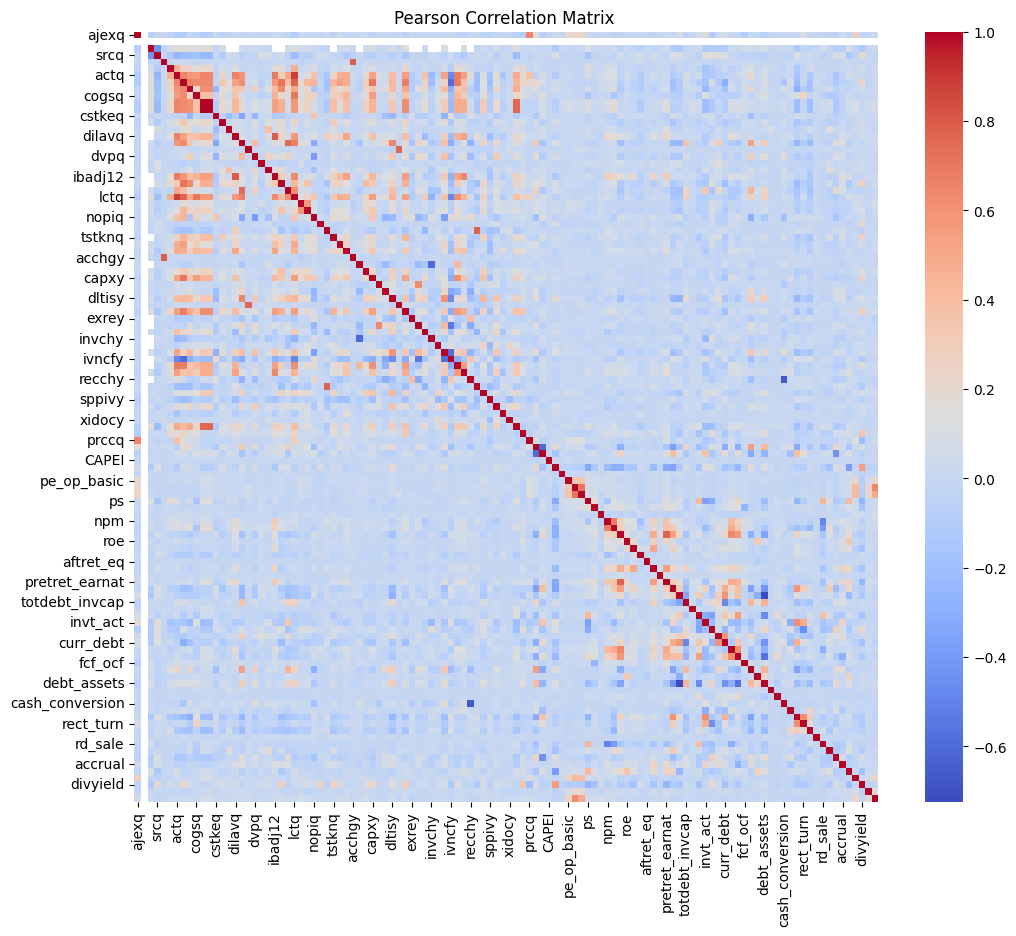

In [108]:
correlation_matrix = df.select_dtypes(include='float').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Pearson Correlation Matrix ")
plt.show()

In [109]:
df['prccq'] = df['prccq'] / df['ajexq']
df['market_cap'] = df['prccq'] * df['cshoq']
df = df.drop(columns=['ajexq'])

columns_to_keep = [
    'tic','datadate',
    'prccq', 'capxy', 'oancfy', 'actq', 'lctq',
    'roa', 'roe','pe_inc', 'divyield',
    'pcf', 'roce', 'gpm','evm', 'npm', 'PEG_trailing',
    'de_ratio', 'ptb', 'market_cap'
]

df = df[columns_to_keep]


In [110]:
df = df.sort_values(by=['tic','datadate'])

df.tail()

,tic,datadate,prccq,capxy,oancfy,actq,lctq,roa,roe,pe_inc,divyield,pcf,roce,gpm,evm,npm,PEG_trailing,de_ratio,ptb,market_cap
15299,ZTS,2022-09-30,148.29,415.0,1171.0,6551.0,2880.0,0.241,0.421,35.192,0.843,38.833,0.252,0.742,28.597,0.258,2.637,1.993,14.605,69168.68418
15300,ZTS,2022-12-31,146.55,586.0,1912.0,7506.0,3167.0,0.236,0.449,37.194,0.898,40.474,0.246,0.736,22.351,0.262,2.791,2.389,17.019,67971.06240
15301,ZTS,2023-03-31,166.44,223.0,549.0,6269.0,1915.0,0.241,0.430,36.797,0.920,35.004,0.249,0.737,23.885,0.255,3.695,2.094,16.287,76977.66780
15302,ZTS,2023-06-30,172.21,389.0,732.0,6183.0,1769.0,0.249,0.467,40.023,0.787,43.869,0.259,0.743,23.067,0.268,3.257,2.085,18.478,79345.92971
15303,ZTS,2023-09-30,173.98,534.0,1456.0,6222.0,1608.0,0.255,0.484,35.909,0.849,36.919,0.265,0.744,23.285,0.271,2.875,2.040,15.485,79948.15950


In [111]:
id_vars = ['tic', 'datadate']
raw_accounting_vars = [col for col in df.columns if col in df1.columns and col not in id_vars]
financial_ratios = [col for col in df.columns if col in df2.columns and col not in id_vars]

for col in raw_accounting_vars:
    df[col + '_change'] = df.groupby('tic')[col].pct_change(fill_method=None)
df = df.drop(columns=raw_accounting_vars)

for col in financial_ratios:
    df[col + '_change'] = df.groupby('tic')[col].pct_change(fill_method=None)

df.head()

,tic,datadate,roa,roe,pe_inc,divyield,pcf,roce,gpm,evm,...,pe_inc_change,divyield_change,pcf_change,roce_change,gpm_change,evm_change,npm_change,PEG_trailing_change,de_ratio_change,ptb_change
0,AAPL,1980-12-31,0.851,0.868,80.303,NaN,-74.325,1.240,0.433,13.535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,1981-03-31,0.606,0.468,77.035,NaN,-85.319,1.587,0.440,17.753,...,-0.040696,NaN,0.147918,0.279839,0.016166,0.311636,0.040000,NaN,-0.244604,0.099702
2,AAPL,1981-06-30,0.539,0.388,34.698,NaN,-56.890,2.136,0.463,18.791,...,-0.549581,NaN,-0.333208,0.345936,0.052273,0.058469,0.105769,NaN,-0.123810,-0.466114
3,AAPL,1981-09-30,0.467,0.376,26.607,NaN,-44.727,0.583,0.487,11.468,...,-0.233183,NaN,-0.213799,-0.727060,0.051836,-0.389708,0.026087,NaN,0.187500,-0.130321
4,AAPL,1981-12-31,0.409,0.286,22.812,NaN,-180.620,0.429,0.503,14.316,...,-0.142632,NaN,3.038277,-0.264151,0.032854,0.248343,-0.033898,NaN,-0.084668,-0.101255


In [112]:
file_path_3 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/s&p500index.csv' # s&p500
df3 = pd.read_csv(file_path_3)
df3['caldt'] = pd.to_datetime(df3['caldt'])  # Adjust column name if needed

df = df.sort_values(by=['datadate'])


#merge (fill empty cells with nearest s&p500 value)
df = pd.merge_asof(df, df3, left_on='datadate', right_on='caldt', direction='nearest')
df = df.drop(columns=['caldt'])

df = df.sort_values(by=['tic','datadate']).reset_index()
df = df.drop(columns=['index'])
df.tail()

,tic,datadate,roa,roe,pe_inc,divyield,pcf,roce,gpm,evm,...,divyield_change,pcf_change,roce_change,gpm_change,evm_change,npm_change,PEG_trailing_change,de_ratio_change,ptb_change,spindx
15225,ZTS,2022-09-30,0.241,0.421,35.192,0.843,38.833,0.252,0.742,28.597,...,0.014440,0.047700,0.003984,-0.001346,-0.055737,-0.011494,0.188909,0.000502,-0.032525,3585.62
15226,ZTS,2022-12-31,0.236,0.449,37.194,0.898,40.474,0.246,0.736,22.351,...,0.065243,0.042258,-0.023810,-0.008086,-0.218415,0.015504,0.058400,0.198695,0.165286,3839.50
15227,ZTS,2023-03-31,0.241,0.430,36.797,0.920,35.004,0.249,0.737,23.885,...,0.024499,-0.135148,0.012195,0.001359,0.068632,-0.026718,0.323898,-0.123483,-0.043011,4109.31
15228,ZTS,2023-06-30,0.249,0.467,40.023,0.787,43.869,0.259,0.743,23.067,...,-0.144565,0.253257,0.040161,0.008141,-0.034247,0.050980,-0.118539,-0.004298,0.134524,4450.38
15229,ZTS,2023-09-30,0.255,0.484,35.909,0.849,36.919,0.265,0.744,23.285,...,0.078780,-0.158426,0.023166,0.001346,0.009451,0.011194,-0.117286,-0.021583,-0.161976,4288.05


In [113]:
df['next_prccq_change'] = df.groupby('tic')['prccq_change'].shift(-1)

df['spindx_change'] = df.groupby('tic')['spindx'].pct_change(fill_method=None)
df['next_spindx_change'] = df.groupby('tic')['spindx_change'].shift(-1)

df['relative_quarterly_return'] = (df['prccq_change'] - df['spindx_change'])
df['next_relative_quarterly_return'] = (df['next_prccq_change'] - df['next_spindx_change'])

df = df.drop(columns=['spindx', 'spindx_change','next_spindx_change'])

df.tail()

,tic,datadate,roa,roe,pe_inc,divyield,pcf,roce,gpm,evm,...,roce_change,gpm_change,evm_change,npm_change,PEG_trailing_change,de_ratio_change,ptb_change,next_prccq_change,relative_quarterly_return,next_relative_quarterly_return
15225,ZTS,2022-09-30,0.241,0.421,35.192,0.843,38.833,0.252,0.742,28.597,...,0.003984,-0.001346,-0.055737,-0.011494,0.188909,0.000502,-0.032525,-0.011734,-0.084526,-0.082539
15226,ZTS,2022-12-31,0.236,0.449,37.194,0.898,40.474,0.246,0.736,22.351,...,-0.023810,-0.008086,-0.218415,0.015504,0.058400,0.198695,0.165286,0.135722,-0.082539,0.065449
15227,ZTS,2023-03-31,0.241,0.430,36.797,0.920,35.004,0.249,0.737,23.885,...,0.012195,0.001359,0.068632,-0.026718,0.323898,-0.123483,-0.043011,0.034667,0.065449,-0.048332
15228,ZTS,2023-06-30,0.249,0.467,40.023,0.787,43.869,0.259,0.743,23.067,...,0.040161,0.008141,-0.034247,0.050980,-0.118539,-0.004298,0.134524,0.010278,-0.048332,0.046754
15229,ZTS,2023-09-30,0.255,0.484,35.909,0.849,36.919,0.265,0.744,23.285,...,0.023166,0.001346,0.009451,0.011194,-0.117286,-0.021583,-0.161976,NaN,0.046754,NaN


In [114]:
df = df.sort_values(by=['tic','datadate'])
df.replace(['inf', '-inf', np.inf, -np.inf], np.nan, inplace=True)


df = df.sort_values(by=['datadate'])
df.head()


,tic,datadate,roa,roe,pe_inc,divyield,pcf,roce,gpm,evm,...,roce_change,gpm_change,evm_change,npm_change,PEG_trailing_change,de_ratio_change,ptb_change,next_prccq_change,relative_quarterly_return,next_relative_quarterly_return
13075,TGT,1970-01-31,0.173,0.123,22.148,1.520,-10.320,0.175,0.281,9.688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.134100,NaN,-0.092933
10313,NOC,1970-01-31,0.117,0.114,9.615,3.200,-8.576,0.128,0.093,7.891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.222222,NaN,-0.181055
2017,BAX,1970-03-31,0.134,0.155,48.364,0.386,-173.860,0.129,0.462,37.617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.273810,NaN,-0.085145
7603,KO,1970-03-31,0.353,0.065,31.611,2.020,27.805,0.456,0.496,16.142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.135514,NaN,0.053150
7388,KMB,1970-03-31,0.160,0.029,14.254,3.380,10.996,0.138,0.346,8.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.154639,NaN,0.034025


In [115]:
#Volatility score

df['volatility_score'] = df.groupby('tic')['prccq_change'].transform(lambda x: x.rolling(window=12, min_periods=1).std())
df.tail()


,tic,datadate,roa,roe,pe_inc,divyield,pcf,roce,gpm,evm,...,gpm_change,evm_change,npm_change,PEG_trailing_change,de_ratio_change,ptb_change,next_prccq_change,relative_quarterly_return,next_relative_quarterly_return,volatility_score
13290,TGT,2023-10-31,0.145,0.265,18.143,3.090,7.473,0.163,0.271,11.034,...,0.026515,-0.107570,0.096774,-0.002287,-0.036473,0.233511,NaN,-0.102062,NaN,0.162548
14970,WMT,2023-10-31,0.153,0.211,8.715,1.450,13.199,0.190,0.261,12.714,...,0.003846,0.020877,0.181818,-0.964468,-0.014552,-0.012752,NaN,0.108318,NaN,0.063424
3598,CSCO,2023-10-31,0.187,0.322,15.263,3.090,11.221,0.318,0.661,11.719,...,0.015361,-0.087447,0.058824,-0.551853,-0.017747,-0.074776,NaN,0.087840,NaN,0.098700
10626,NVDA,2023-10-31,0.505,0.782,6.533,0.032,64.929,0.580,0.733,37.991,...,0.054676,-0.300710,0.332278,NaN,-0.091667,-0.058060,NaN,-0.041198,NaN,0.296805
6228,HD,2023-10-31,0.326,8.391,22.243,2.410,16.398,0.438,0.334,14.535,...,-0.002985,0.013528,-0.028571,0.479151,-0.032735,0.398809,NaN,-0.061115,NaN,0.111271


In [116]:
# Context

file_path_4 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/context/cay_data.csv' # 
file_path_5 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/context/fama_french_5_factors_plus_momentum.csv' # 
file_path_6 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/context/financial_uncertainty_index.csv' # 
file_path_7 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/context/macro_uncertaintly_index.csv' # 
file_path_8 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/context/q-factors.csv' # 

df4 = pd.read_csv(file_path_4)
df5 = pd.read_csv(file_path_5)
df6 = pd.read_csv(file_path_6)
df7 = pd.read_csv(file_path_7)
df8 = pd.read_csv(file_path_8)


df4['date'] = pd.to_datetime(df4['date'])
df5['dateff'] = pd.to_datetime(df5['dateff'])
df6['date'] = pd.to_datetime(df6['date'])
df7['date'] = pd.to_datetime(df7['date'])
# Convert year and quarter to quarter-end datetime
df8['date'] = pd.to_datetime(df8['year'].astype(str) + 'Q' + df8['quarter'].astype(str)) + pd.offsets.QuarterEnd(0)
df8.drop(['year', 'quarter'], axis=1, inplace=True)
df8['date'] = pd.to_datetime(df8['date'])

df5.rename(columns={'dateff': 'date'}, inplace=True)

# Standardize to month end
for i in [df4, df5, df6, df7]:
    i['date'] = i['date'].dt.to_period('M').dt.to_timestamp('M')

df_context = df4.merge(df5, on='date', how='outer') \
               .merge(df6, on='date', how='outer') \
               .merge(df7, on='date', how='outer') \
               .merge(df8, on='date', how='outer') \
               .sort_values('date').reset_index(drop=True)

df_context = df_context.drop(columns=['c', 'a', 'y', 'cay'])

df_context.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    810 non-null    datetime64[ns]
 1   mktrf   738 non-null    float64       
 2   smb     738 non-null    float64       
 3   hml     738 non-null    float64       
 4   rmw     738 non-null    float64       
 5   cma     738 non-null    float64       
 6   rf      738 non-null    float64       
 7   umd     738 non-null    float64       
 8   h_1_x   714 non-null    float64       
 9   h_3_x   714 non-null    float64       
 10  h_12_x  714 non-null    float64       
 11  h_1_y   714 non-null    float64       
 12  h_3_y   714 non-null    float64       
 13  h_12_y  714 non-null    float64       
 14  r_f     212 non-null    float64       
 15  r_mkt   212 non-null    float64       
 16  r_me    212 non-null    float64       
 17  r_ia    212 non-null    float64       
 18  r_roe   21

/var/folders/2f/bmcm36r135v_v27k0vz0w_dr0000gn/T/ipykernel_58799/857685063.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df8['date'] = pd.to_datetime(df8['year'].astype(str) + 'Q' + df8['quarter'].astype(str)) + pd.offsets.QuarterEnd(0)


In [117]:
#df_context.to_csv('context.csv', index=False)

In [118]:
# Replace inf and -inf with NaN
df_context.replace(['inf', '-inf', np.inf, -np.inf], np.nan, inplace=True)

df_context = df_context.dropna()
df_context.head(10)

,date,mktrf,smb,hml,rmw,cma,rf,umd,h_1_x,h_3_x,h_12_x,h_1_y,h_3_y,h_12_y,r_f,r_mkt,r_me,r_ia,r_roe,r_eg
116,1967-03-31,0.0399,0.0187,0.0037,0.0086,-0.0160,0.0039,0.0153,0.918090,0.952662,0.982072,0.616383,0.739871,0.865610,1.1406,13.3616,11.4466,-5.3001,8.4933,-1.1459
119,1967-06-30,0.0241,0.0643,0.0085,-0.0062,-0.0242,0.0027,0.0600,0.895576,0.934862,0.976690,0.614591,0.741683,0.869119,0.9172,1.8431,8.7787,-2.4629,2.0749,-2.4294
122,1967-09-30,0.0311,0.0244,-0.0250,0.0020,-0.0095,0.0032,0.0252,0.871980,0.918416,0.973204,0.627504,0.754038,0.878176,0.9601,6.8744,5.3219,3.9620,-0.7878,-0.7295
125,1967-12-31,0.0305,0.0575,-0.0053,-0.0081,0.0013,0.0033,0.0325,0.896381,0.937069,0.979059,0.655009,0.777824,0.890536,1.0668,0.2618,5.3799,-5.0151,5.1894,1.8397
128,1968-03-31,0.0020,-0.0159,-0.0059,0.0105,-0.0110,0.0038,0.0323,0.934794,0.966593,0.988554,0.627678,0.755234,0.877596,1.1806,-7.5774,1.5096,6.1718,-1.4313,5.5496
131,1968-06-30,0.0069,-0.0028,0.0073,-0.0141,0.0276,0.0043,-0.0190,0.899286,0.941277,0.982825,0.609827,0.736695,0.864775,1.3431,12.3258,12.7322,-2.3778,5.8774,-2.4666
134,1968-09-30,0.0403,0.0281,0.0030,-0.0199,0.0087,0.0043,-0.0065,0.887270,0.932211,0.980951,0.594930,0.723696,0.857163,1.3529,2.6345,2.3595,2.8402,-6.4857,4.0929
137,1968-12-31,-0.0394,0.0352,-0.0001,-0.0186,0.0176,0.0043,-0.0001,0.916276,0.954806,0.988988,0.607219,0.736870,0.867253,1.3157,1.8735,5.5274,4.2191,-0.5826,0.9068
140,1969-03-31,0.0264,-0.0045,-0.0051,-0.0143,-0.0035,0.0046,0.0397,0.954562,0.985335,0.999159,0.618659,0.755124,0.886844,1.4516,-4.5832,-4.5365,2.3035,2.7170,5.1590
143,1969-06-30,-0.0718,-0.0545,-0.0108,0.0432,-0.0160,0.0051,-0.0230,1.069164,1.071092,1.024023,0.641691,0.781127,0.909528,1.5288,-5.8737,-4.5576,1.0915,5.2259,2.5603


In [119]:
file_path_9 = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/RATIOS_INDUSTRY_ALL.csv' # Fundamental data
df9 = pd.read_csv(file_path_9)
df9.rename(columns={'public_date': 'date'}, inplace=True)
df9['date'] = pd.to_datetime(df9['date'])

selected_columns = [
    'date', 'FFI10_desc', 'divyield_Median', 'PEG_trailing_Median', 'divyield_Median', 'pe_inc_Median', 'ptb_Median', 'evm_Median', 'roce_Median', 'roe_Median','bm_Median'
]

df9 = df9[selected_columns]

df9 = df9.dropna(axis=1)

df_context = df_context.merge(df9, on='date', how='inner')

df_context.head(25)


,date,mktrf,smb,hml,rmw,cma,rf,umd,h_1_x,h_3_x,...,FFI10_desc,divyield_Median,PEG_trailing_Median,divyield_Median,pe_inc_Median,ptb_Median,evm_Median,roce_Median,roe_Median,bm_Median
0,1970-03-31,-0.0106,-0.0241,0.0399,-0.0100,0.0429,0.0057,-0.0036,1.165126,1.148224,...,DURBL,3.59%,0.815,3.59%,13.356,1.477,7.574,0.173,0.120,0.542
1,1970-03-31,-0.0106,-0.0241,0.0399,-0.0100,0.0429,0.0057,-0.0036,1.165126,1.148224,...,ENRGY,3.09%,1.169,3.09%,15.247,1.716,8.097,0.095,0.105,0.505
2,1970-03-31,-0.0106,-0.0241,0.0399,-0.0100,0.0429,0.0057,-0.0036,1.165126,1.148224,...,HITEC,2.45%,1.518,2.45%,18.305,1.962,10.388,0.157,0.093,0.384
3,1970-03-31,-0.0106,-0.0241,0.0399,-0.0100,0.0429,0.0057,-0.0036,1.165126,1.148224,...,HLTH,1.97%,2.815,1.97%,28.478,4.453,14.583,0.218,0.146,0.221
4,1970-03-31,-0.0106,-0.0241,0.0399,-0.0100,0.0429,0.0057,-0.0036,1.165126,1.148224,...,MANUF,3.75%,1.121,3.75%,13.619,1.302,7.506,0.151,0.105,0.699
5,1970-03-31,-0.0106,-0.0241,0.0399,-0.0100,0.0429,0.0057,-0.0036,1.165126,1.148224,...,NODUR,3.38%,1.147,3.38%,14.105,1.475,7.902,0.172,0.118,0.602
6,1970-03-31,-0.0106,-0.0241,0.0399,-0.0100,0.0429,0.0057,-0.0036,1.165126,1.148224,...,OTHER,3.19%,0.939,3.19%,14.779,1.671,9.811,0.104,0.099,0.533
7,1970-03-31,-0.0106,-0.0241,0.0399,-0.0100,0.0429,0.0057,-0.0036,1.165126,1.148224,...,SHOPS,2.70%,1.156,2.70%,14.480,1.676,8.002,0.187,0.132,0.522
8,1970-03-31,-0.0106,-0.0241,0.0399,-0.0100,0.0429,0.0057,-0.0036,1.165126,1.148224,...,TELCM,3.09%,1.935,3.09%,17.073,1.868,9.163,0.121,0.123,0.442
9,1970-03-31,-0.0106,-0.0241,0.0399,-0.0100,0.0429,0.0057,-0.0036,1.165126,1.148224,...,UTILS,5.85%,2.825,5.85%,11.172,1.311,8.993,0.105,0.125,0.799


In [120]:
df = df.sort_values(by=['datadate'])

# Corrected industry mapping
ticker_to_industry = {
    # Durable Goods (DURBL)
    'TSLA': 'DURBL', 'F': 'DURBL',

    # Energy (ENRGY)
    'XOM': 'ENRGY', 'CVX': 'ENRGY', 'COP': 'ENRGY', 'OXY': 'ENRGY',

    # High-Tech (HITEC)
    'AAPL': 'HITEC', 'MSFT': 'HITEC', 'GOOGL': 'HITEC', 'AMZN': 'HITEC', 'META': 'HITEC',
    'NVDA': 'HITEC', 'INTC': 'HITEC', 'CSCO': 'HITEC', 'QCOM': 'HITEC', 'ADBE': 'HITEC', 
    'PYPL': 'HITEC', 'NFLX': 'HITEC', 'MU': 'HITEC', 'WDC': 'HITEC', 'CTSH': 'HITEC', 'EXPE': 'HITEC',

    # Healthcare (HLTH)
    'JNJ': 'HLTH', 'PFE': 'HLTH', 'MRK': 'HLTH', 'ABT': 'HLTH', 'LLY': 'HLTH', 
    'BMY': 'HLTH', 'MDT': 'HLTH', 'HCA': 'HLTH', 'ZTS': 'HLTH', 'AMGN': 'HLTH', 'REGN': 'HLTH',

    # Manufacturing (MANUF)
    'BA': 'MANUF', 'RTX': 'MANUF', 'LMT': 'MANUF', 'GE': 'MANUF', 'CAT': 'MANUF', 
    'MMM': 'MANUF', 'ETN': 'MANUF', 'JCI': 'MANUF', 'NOC': 'MANUF', 'TMO': 'MANUF',

    # Non-Durable Goods (NODUR) - (Moved NKE here)
    'PG': 'NODUR', 'KO': 'NODUR', 'CL': 'NODUR', 'WBA': 'NODUR', 'CVS': 'NODUR', 
    'PPL': 'NODUR', 'TGT': 'NODUR', 'STZ': 'NODUR', 'NKE': 'NODUR',

    # Other (OTHER)
    'BRK.B': 'OTHER', 'JPM': 'OTHER', 'GS': 'OTHER', 'WFC': 'OTHER', 'SPGI': 'OTHER',
    'SCHW': 'OTHER', 'MMC': 'OTHER', 'AIG': 'OTHER', 'AON': 'OTHER', 'PGR': 'OTHER', 
    'CME': 'OTHER', 'RJF': 'OTHER', 'ADM': 'OTHER', 'APD': 'OTHER', 'EQIX': 'OTHER',

    # Shops (SHOPS)
    'WMT': 'SHOPS', 'MCD': 'SHOPS', 'SBUX': 'SHOPS', 'TGT': 'SHOPS', 'COST': 'SHOPS', 
    'DIS': 'SHOPS', 'TSN': 'SHOPS',

    # Telecom (TELCM)
    'T': 'TELCM', 'VZ': 'TELCM',

    # Utilities (UTILS)
    'EXC': 'UTILS', 'ECL': 'UTILS',
}

# Add industry column to DataFrame
df['FFI10_desc'] = df['tic'].map(ticker_to_industry)

# Assign 'OTHER' to any tickers not in the dictionary
df['FFI10_desc'] = df['FFI10_desc'].fillna('OTHER')

df_context.rename(columns={'date': 'datadate'}, inplace=True)

df = pd.merge(df, df_context, on=['datadate', 'FFI10_desc'], how='inner')

df['datadate'] = df['datadate'] + pd.offsets.QuarterEnd(0)
df = df.sort_values(by=['tic','datadate'])

df['divyield_Median'] = df['divyield_Median'].replace('%', '', regex=True).astype(float)

df.tail(30)

,tic,datadate,roa,roe,pe_inc,divyield,pcf,roce,gpm,evm,...,r_eg,divyield_Median,PEG_trailing_Median,divyield_Median,pe_inc_Median,ptb_Median,evm_Median,roce_Median,roe_Median,bm_Median
11806,XOM,2019-12-31,0.090,0.066,15.310,6.770,7.326,0.054,0.174,10.963,...,0.6485,2.55,0.090,2.55,3.964,0.919,5.440,0.061,0.047,1.103
9716,ZTS,2012-12-31,0.179,0.104,37.954,0.787,7.201,0.201,0.673,0.543,...,-6.3589,1.93,0.013,1.93,-4.603,3.117,-1.596,-0.056,-0.121,0.306
9799,ZTS,2013-03-31,0.188,0.106,34.409,0.813,5.220,0.215,0.677,6.283,...,-2.4635,1.97,0.168,1.97,-2.115,3.247,-1.792,-0.059,-0.081,0.337
9860,ZTS,2013-06-30,0.187,0.129,34.702,0.892,26.027,0.220,0.673,8.912,...,-1.0721,1.94,-0.004,1.94,-5.160,3.386,-2.429,-0.089,-0.181,0.300
9925,ZTS,2013-09-30,0.190,0.143,39.936,0.835,22.475,0.227,0.672,12.668,...,-1.9824,1.78,-0.016,1.78,-8.037,3.953,-3.142,-0.090,-0.180,0.293
9981,ZTS,2013-12-31,0.202,0.180,30.713,0.928,22.776,0.246,0.678,15.469,...,0.2952,1.88,-0.054,1.88,-8.568,4.014,-3.241,-0.070,-0.242,0.265
10118,ZTS,2014-03-31,0.210,0.458,29.519,0.938,40.799,0.257,0.683,14.450,...,1.7966,1.86,-0.034,1.86,-4.504,4.184,-3.896,-0.128,-0.148,0.259
10159,ZTS,2014-06-30,0.210,0.432,33.752,0.813,32.413,0.252,0.685,14.445,...,1.4601,1.94,-0.053,1.94,-9.862,3.827,-4.832,-0.090,-0.255,0.250
10224,ZTS,2014-09-30,0.215,0.421,40.116,0.641,41.945,0.253,0.682,14.468,...,3.5505,2.05,-0.068,2.05,-8.681,3.494,-5.017,-0.109,-0.262,0.257
10318,ZTS,2014-12-31,0.208,0.409,39.733,0.720,36.871,0.244,0.680,18.437,...,0.4985,1.83,-0.061,1.83,-10.213,3.883,-4.439,-0.114,-0.267,0.269


In [121]:


#df.to_csv('dati_with_context_f.csv', index=False)  # Set index=False to exclude the index column
print(df.columns.tolist())


['tic', 'datadate', 'roa', 'roe', 'pe_inc', 'divyield', 'pcf', 'roce', 'gpm', 'evm', 'npm', 'PEG_trailing', 'de_ratio', 'ptb', 'market_cap', 'prccq_change', 'capxy_change', 'oancfy_change', 'actq_change', 'lctq_change', 'roa_change', 'roe_change', 'pe_inc_change', 'divyield_change', 'pcf_change', 'roce_change', 'gpm_change', 'evm_change', 'npm_change', 'PEG_trailing_change', 'de_ratio_change', 'ptb_change', 'next_prccq_change', 'relative_quarterly_return', 'next_relative_quarterly_return', 'volatility_score', 'FFI10_desc', 'mktrf', 'smb', 'hml', 'rmw', 'cma', 'rf', 'umd', 'h_1_x', 'h_3_x', 'h_12_x', 'h_1_y', 'h_3_y', 'h_12_y', 'r_f', 'r_mkt', 'r_me', 'r_ia', 'r_roe', 'r_eg', 'divyield_Median', 'PEG_trailing_Median', 'divyield_Median', 'pe_inc_Median', 'ptb_Median', 'evm_Median', 'roce_Median', 'roe_Median', 'bm_Median']
